In [32]:
import numpy as np
import scipy as sci
import math
from scipy.optimize import curve_fit
from scipy.special import voigt_profile
import matplotlib.pyplot as plt 
import pandas as pd
import openpyxl

# Actividad 2

In [44]:
data = pd.read_excel("Torque magnético.xlsx",engine="openpyxl",sheet_name="Hoja3").to_numpy().T
I = data[0]
T = data[1]
B0 = 1.356 * 1e-3
m_e = 141.3 * 1e-3 #masa esfera
r = 0.5 * 5.165 * 1e-2 #radio esfera
m_e_err = 0.1 * 1e-3
r_err = 0.5 * 0.025 * 1e-2
B = B0*I
r,r_err

(0.025825, 0.000125)

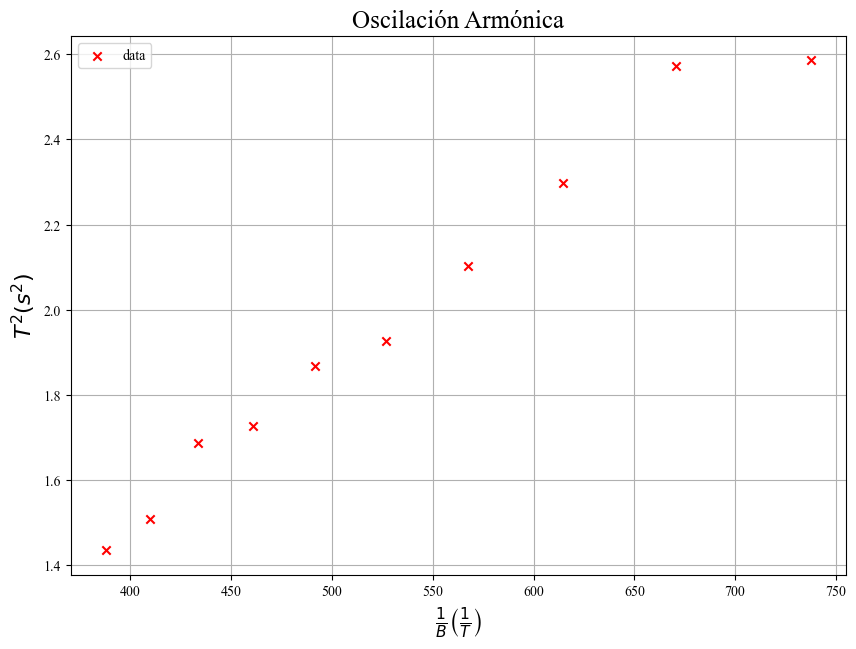

In [34]:
plt.rc('font', family='Times New Roman') 
plt.figure(figsize = (10, 7))
plt.scatter(1/B,T**2,marker='x',color='r',label='data')
plt.title("Oscilación Armónica", fontsize=18)
plt.ylabel(r'$T^{2} (s^{2})$', fontsize=16)
plt.xlabel(r'$\frac{1}{B} \left( \frac{1}{T} \right)$',fontsize=16)
plt.grid(True)
plt.legend()

In [35]:
data

array([[1.    , 1.1   , 1.2   , 1.3   , 1.4   , 1.5   , 1.6   , 1.7   ,
        1.8   , 1.9   ],
       [1.608 , 1.6035, 1.5155, 1.45  , 1.388 , 1.3665, 1.3145, 1.2985,
        1.2285, 1.198 ]])

In [36]:
1/B,T**2

(array([737.46312684, 670.4210244 , 614.5526057 , 567.27932834,
        526.75937632, 491.64208456, 460.91445428, 433.80183932,
        409.70173714, 388.13848781]),
 array([2.585664  , 2.57121225, 2.29674025, 2.1025    , 1.926544  ,
        1.86732225, 1.72791025, 1.68610225, 1.50921225, 1.435204  ]))

In [37]:
incer_x = np.abs(0.05*(1//(B0*(I**2))))
incer_y = np.abs(2*T*0.05)
incer_x, incer_y

(array([36.85, 30.45, 25.6 , 21.8 , 18.8 , 16.35, 14.4 , 12.75, 11.35,
        10.2 ]),
 array([0.1608 , 0.16035, 0.15155, 0.145  , 0.1388 , 0.13665, 0.13145,
        0.12985, 0.12285, 0.1198 ]))

Text(0, 0.5, 'Residual normalizado')

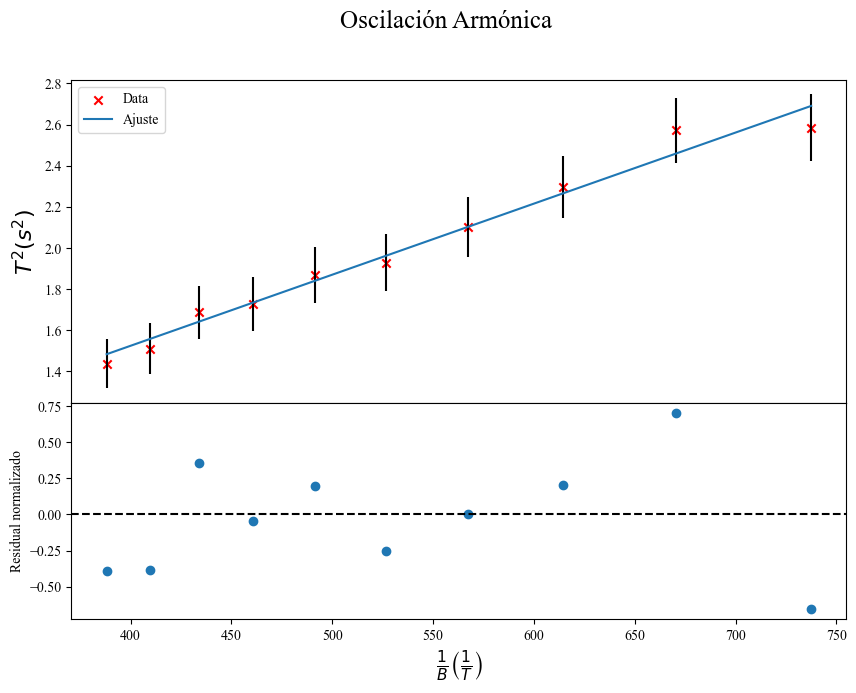

In [38]:
coef,cov = np.polyfit(1/B,T**2,1,cov=True,w=incer_y)
model = np.poly1d(coef)
x = 1/B
y = T**2
x_ = np.linspace(x[0],x[-1])

fig, axs = plt.subplots(2, 1, figsize=(10, 7), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)
fig.suptitle("Oscilación Armónica", fontsize=18)

axs[0].scatter(x,y,marker='x',color='r',label='Data')
axs[0].errorbar(x,y,yerr= incer_y, fmt='none', ecolor='black')
axs[0].plot(x_,model(x_),label='Ajuste')
axs[0].set_ylabel(r'$T^{2} (s^{2})$', fontsize=16)
#axs[0].text(0.184,0.00152,'m = (109e-04 $\pm$ 2e-04)\nb = (0.6e-05 $\pm$ 2.8e-05)\n$R^{2} = 0.973$',fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
axs[0].legend()

axs[1].scatter(x,(y-model(x))/incer_y)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel(r'$\frac{1}{B} \left( \frac{1}{T} \right)$',fontsize=16)
axs[1].set_ylabel('Residual normalizado')

In [39]:
coef

array([0.00345999, 0.13921368])

In [40]:
coef_err = np.sqrt(np.diagonal(cov))
coef_err

array([0.00019673, 0.11074695])

In [41]:
m = coef[0]
m_err = coef_err[0]
Iner = (2/5) * m_e * (r**2)
Iner_err = (2/5) * r * np.sqrt((r*m_e_err)**2 + (2*m_e*r_err)**2)

mu = 4 * (np.pi**2) * (Iner/m)
mu_err = 4 * (np.pi**2) * np.sqrt((Iner_err/m)**2 + (Iner*m_err*(1/(m**2)))**2)
mu,mu_err

(np.float64(0.43009849020039825), np.float64(0.024808265321961353))

In [43]:
Iner,Iner_err

(3.7694918925000006e-05, np.float64(3.6588109466910583e-07))

In [47]:
mu_err/mu,abs(mu-0.4)/mu_err

(np.float64(0.05768042875575382), np.float64(1.213244449371224))